# Estas son las librerias

In [ ]:
# comentario !!
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Cargar los datos

In [ ]:
dataset = pd.read_csv('apple_quality.csv')
dataset

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [ ]:
# elimina los NaN
dataset = dataset.dropna()
dataset.shape

(4000, 9)

In [ ]:
# etiquetas
y = np.array(dataset['Quality'].map({'good':0, 'bad':1}))

# caracteristicas
x = np.array(dataset.drop(['A_id', 'Quality'], axis=1), dtype = np.float32)

In [ ]:
y.shape

(4000,)

In [ ]:
# particion de los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(3200, 7)
(3200,)
(800, 7)
(800,)


In [ ]:
x_train.shape[1]

7

# Modelo (Red neuronal)

In [ ]:
model = Sequential()

# capa de entrada
model.add(tf.keras.layers.Input(shape=(x_train.shape[1])))

# capa oculta
model.add(tf.keras.layers.Dense(units=10, activation='relu'))

# capa de salida
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# arquitectura
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                80        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Entrenamiento

In [ ]:
# parametros del entrenamiento
model.compile(optimizer='Adam', loss='binary_crossentropy')

# entrenar
history = model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
100/100 [==============================] - 2s 7ms/step - loss: 0.2844
Epoch 2/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 3/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.2823
Epoch 4/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.2816
Epoch 5/1000
100/100 [==============================] - 1s 5ms/step - loss: 0.2808
Epoch 6/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2798
Epoch 7/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2791
Epoch 8/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2782
Epoch 9/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2772
Epoch 10/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2768
Epoch 11/1000
100/100 [==============================] - 0s 1ms/step - loss: 0.2762
Epoch 12/1000
100/100 [==============================] - 0s 2ms/step - loss: 0.2754
E

Text(0.5, 1.0, 'Error durante el entrenamiento')

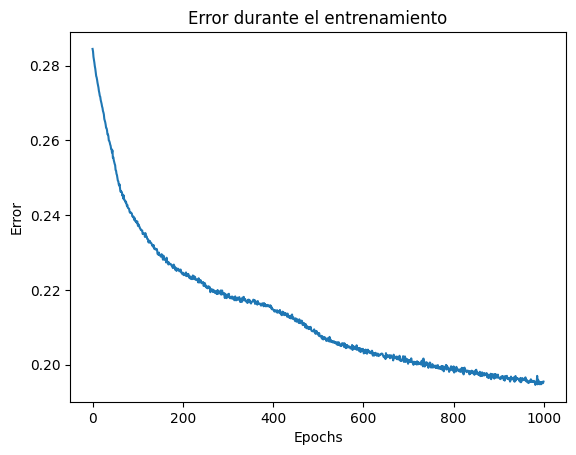

In [ ]:
plt.plot(history.history['loss'])
plt.ylabel('Error')
plt.xlabel('Epochs')
plt.title('Error durante el entrenamiento')

#Predicciones

In [ ]:
# predicciones
predictions = model.predict(x_test)
y_pred = (predictions >=0.5).astype(int)

25/25 [==============================] - 0s 1ms/step


In [ ]:
acc = accuracy_score(y_test, y_pred)
print('Acierto: ', round(acc, 3)*100, '%')

Acierto:  90.60000000000001 %
